# Prédiction du Prix de vente des Bulldozers en utilisant le ML

Dans ce carnet de notes, nous allons passer en revue un exemple de projet d'apprentissage automatique de régression dont le but est de prédire le prix de vente des bulldozers .
> Puisque nous avons déjà un ensemble de données, nous aborderons le problème avec le cadre de modélisation d'apprentissage automatique suivant : 
![processus](processus.png)


## 1. Définition du Problème

> Dans quelle mesure peut on prédire le prix de vente futur d'un bulldozer compte tenu de ses caractéristiqes et des exemples précédents de vente de bulldozers similaires ?

## 2. Nos données

Notre ensemble de données provient de Kaggle (Blue Book for Bulldozers Competition) : 

* Train.csv  : est l'ensemble de formation, qui contient des données jusqu'à la fin de 2011.
* Valid.csv : est l'ensemble de validation, qui contient des données du 1er janvier 2012 au 30 avril 2012. Nous ferons des prédictions sur cet ensemble pendant la majeure partie de notre étude. Notre score sur cet ensemble est utilisé pour créer le classement public.
* Test.csv : est le jeu de test, qui ne sera pas publié avant la dernière semaine du concours. Il contient des données du 1er mai 2012 à novembre 2012. Notre score sur l'ensemble de test déterminera notre classement final pour le concours.


## 3. Évaluation

La métriqe d'évaluation pour cette compétition est la RMSLE ou racine logarithme moyenne au carrée (Root Mean Squared Log Error)

NB : Notons que le but de la plupart des métriques d'évaluation de régression est de minimiser l'erreur; par exemple notre objectif dans ce projet sera de construire un modèle ML qui minimise la RMSLE.

## 4. Caractéristiques

Nous avons un dictionnaire de données provenant de Kaggle accessible par le lien ci-dessous :  

https://docs.google.com/spreadsheets/d/1lmG8NhM8G_F1jeK4YGOuiK4veJDsxRcC3RY93yjJU00/edit#gid=1137240615

## Importons nos données et Explorons les

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
%matplotlib inline

In [2]:
# Importons nos données d'entrainements et de validation

df = pd.read_csv("./data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [5]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

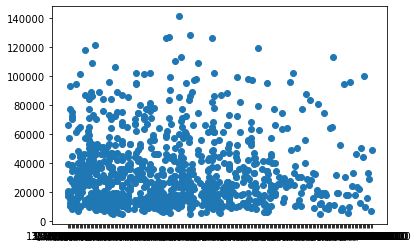

In [6]:
# Nos données sont une série temporelle, nous allos observer nos prix de vente par rapport aux dates de ventes
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [7]:
df["saledate"][:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

In [8]:
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:ylabel='Frequency'>

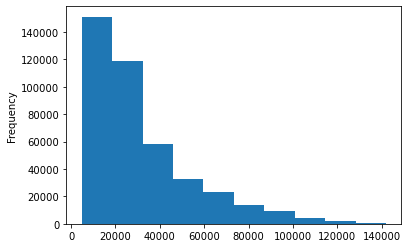

In [9]:
df.SalePrice.plot.hist()

### Reformattons les dates

Lorqu'on travaille avec des données de series temporelles, nous voulons enrichir notre composante "date" autant que possible.
Nous pouvons y arriver grâce à pandas en cherchant laquelle de nos colonnes contient les dates en utilisant le paramètre ` parse_dates` 

In [10]:
# Nous allons encore importer notre ensemble de données en tenant compte cette fois ci des dates

df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", 
            low_memory=False, 
            parse_dates=["saledate"]) # Car nos dates sont des objets à la base, nous allons les convertir
                                      # en un type datetime


In [11]:
df.saledate[:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

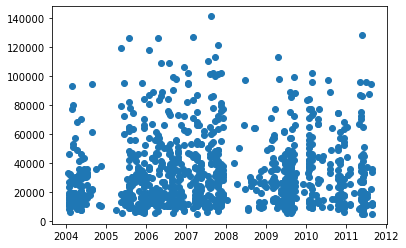

In [12]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [13]:
pattern = df["YearMade"].value_counts()
pattern = pattern[60:1000] # pattern est une variable pandas Series
pattern

1953    7
1951    7
1952    6
1955    5
1954    3
1948    3
2014    2
1942    1
1937    1
1949    1
1947    1
2012    1
2013    1
Name: YearMade, dtype: int64

In [14]:
labels = pattern.index
labels # ettiquettes données à chaque part du diagramme

Int64Index([1953, 1951, 1952, 1955, 1954, 1948, 2014, 1942, 1937, 1949, 1947,
            2012, 2013],
           dtype='int64')

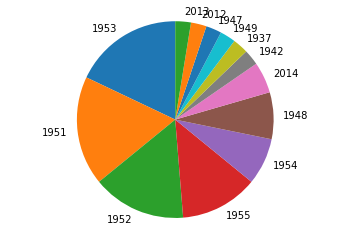

In [15]:
# Petite parenthèse pour découvrir le diagramme circulaire avec matplotlib
fig, ax = plt.subplots()
ax.pie(pattern, labels=labels, startangle=90)
ax.axis("equal")
plt.show();

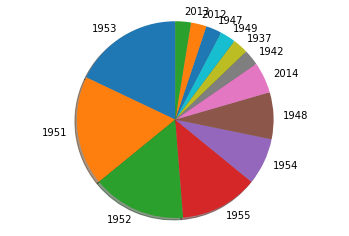

In [16]:

fig, ax = plt.subplots()
ax.pie(pattern, labels=labels, startangle=90,shadow=True)
ax.axis("equal")
plt.show();
##################################################################

In [17]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [18]:
df.saledate.head(5)

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

### Trions notre cadre de données par rapport à la date de vente

Lorsque nous travaillons avec des données de Séries temporelles(chronologiques), c'est une bonne idée de trier par date.

In [19]:
# Tions notre Dataframe

df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

### Une bonne pratique d'avoir une copie du dataframe d'origine . 
Pourquoi? Prudence, pouvoir revenir en arrière . 

In [20]:
# Faisons une copie afin de ne pas endommager par la suite notre ensemble de données
# Si nous voulions revenir en arrière ce serait simple

df_tmp = df.copy()

### Ajoutons des paramètres de types datetime pour la colonne `saledate`

Nous allons procéder à l'ingénieurie des fonctionnalités qui est le processus de sélection, de manipulation et de transformation des données brutes en fonctionnalités pouvant être utilisées dans le ML, c'est à dire concevoir et former de meilleures fonctionnalités dans le but de simplifier et d'accélérer les transformations de données tout en améliorant la précision du modèle .

In [21]:
# Nous allons créer une colonne d'année de vente à partir de la colonne saledate en utilisant dt
df_tmp[:3].saledate.dt.year

205615    1989
274835    1989
141296    1989
Name: saledate, dtype: int64

In [22]:
 df_tmp[:1].saledate.dt.day

205615    17
Name: saledate, dtype: int64

In [23]:
 df_tmp[:1].saledate

205615   1989-01-17
Name: saledate, dtype: datetime64[ns]

In [24]:
# Enrichissons notre cadre de données avec quelques colonnes relatives à ces différentes valeurs

df_tmp["saleYear"] = df_tmp.saledate.dt.year 
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.day_of_week
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.day_of_year


In [25]:
 df_tmp.head().T
# Du coup après observation de notre série chronologique nous n'avons plus pratiquement besoin 
# de la colonne saledate avec ces nouvelles colonnes obtenues grâce aux paramètres de datetime 

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [26]:
# Donc nous allons supprimer notre colonne saledate car maintenant nous avons l'nformation à travers 
# 5 colonnes
df_tmp.drop("saledate", axis=1, inplace=True)

In [27]:
# Nous allons vérifer les valeurs de nos différentes colonnes
# Vérifions pour la colonne `state` (état américain dans lequel la vente a eu lieu => définition dans le dictionnaire )
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modélisation

Nous avons un peu exploré notre jeu de données et l'avons enrichi avec quelques attributs datetime, essayons maintenant de modéliser.

Pourquoi modéliser si tôt ?

Nous connaissons la métrique d'évaluation vers laquelle nous nous dirigeons. Nous pourrions passer plus de temps à faire de l'analyse exploratoire des données (AED), à en savoir plus sur les données nous-mêmes, mais ce que nous ferons à la place, c'est utiliser un modèle d'apprentissage automatique pour nous aider à faire de l'AED.

N'oublions pas que l'un des principaux objectifs du démarrage de tout nouveau projet d'apprentissage automatique est de réduire le temps entre les expériences.

In [28]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42)

In [29]:
# Vérifiez les catégories manquantes et les différents types de données
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [30]:
# Vérifier les valeurs manquantes
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Convertissons nos champs de type string en catégories

Une façon de transformer toutes nos données en chiffres est de les convertir en catégories à l'aide de pandas.
Pour consulter les différents types de données compatibles avec pandas: https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_period_dtype.html



In [31]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [32]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [33]:
# Pour trouver les colones de types chaines de caractères, nous allons utiliser la boucle for

colonnes = []
for label, contenu in df_tmp.items():
    if pd.api.types.is_string_dtype(contenu):
        colonnes.append(label)
print(colonnes)

['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls', 'Differential_Type', 'Steering_Controls']


In [34]:
for label, contenu in df_tmp.items():
    if pd.api.types.is_string_dtype(contenu):
        df_tmp[label] = contenu.astype("category").cat.as_ordered()

In [35]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [36]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [37]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [38]:
# Toutes les valeurs des données catégorielles sont soit dans categories ou np.nan. 
#L'ordre est défini par l'ordre des catégories, et non par l'ordre lexical des valeurs. 
#En interne, la structure de données se compose d'un tableau de catégories et d'un tableau 
#d'entiers de codes qui pointent vers la valeur réelle dans le tableau de catégories.
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Grâce aux types de données de catégories, nous pouvons accéder à nos données sous forme de chiffres.
Néanmoins nous avons toujours des données manquantes

In [39]:
# Jetons un coup d'oeil sur les données manquantes de notre dataframe
df_tmp.isnull().sum() / len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

## Enregistrer les données pré-traitées

In [40]:
df_tmp.to_csv("./data/bluebook-for-bulldozers/train_tmp.csv", index=False)

In [41]:
# Nous allons importer nos données prétraitées
df_tmp = pd.read_csv("./data/bluebook-for-bulldozers/train_tmp.csv", low_memory=False)
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [42]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Remplisons nos valeurs manquantes

### Remplisons d'abord les valeurs numériques manquantes

In [43]:
# Comment retrouver les colonnes numériques
for label, contenu in df_tmp.items():
    if(pd.api.types.is_numeric_dtype(contenu)):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [44]:
df_tmp.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [45]:
# Quelles colonnes numériques contiennent des valeurs nulles ?
for label, contenu in df_tmp.items():
    if pd.api.types.is_numeric_dtype(contenu):
        if pd.isnull(contenu).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [46]:
# Nous allons remplir nos données avec la médianne
for label, contenu in df_tmp.items():
    if pd.api.types.is_numeric_dtype(contenu):
        if pd.isnull(contenu).sum():
            # Nous allons ajouter une colonne binaire qui nous dira si les données étaient manquantes ou non
            df_tmp[label+"_is_missing"] = pd.isnull(contenu)
            # Remplir avec la médianne les valeurs numériques manquantes
            df_tmp[label] = contenu.fillna(contenu.median())
            

In [47]:

for label, contenu in df_tmp.items():
    if pd.api.types.is_numeric_dtype(contenu):
        if pd.isnull(contenu).sum():
            print(label)

In [48]:
df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

### Remplissons et transformons nos variables catégorielles en chiffres

In [49]:
# Vérifions les colonnes qui ne sont pas numériques
for label, contenu in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(contenu):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [50]:
pd.Categorical(df_tmp["state"]).codes + 1


array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [51]:
# Transformer nos variables catégorielles en chiffres et remplir les valeurs manquantes
# Pourquoi +1 ? => Avec les catégories de pandas, s'il y a une valeur manquante => code <= 0
for label, contenu in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(contenu):
        # Nous allons ajouter une colonne booléenne comme précédemment
        df_tmp[label + "_est_vide"] = pd.isnull(contenu)
        # Transformons nos champs catégoriels en chiffres et ajoutons+1
        df_tmp[label] = pd.Categorical(contenu).codes + 1

In [52]:
pd.Categorical(df_tmp["UsageBand"]).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [53]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_est_vide
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [54]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_est_vide,False,True,False,True,False
Blade_Type_est_vide,False,True,False,True,False
Travel_Controls_est_vide,False,True,False,True,False
Differential_Type_est_vide,True,False,True,False,True


In [55]:
df_tmp.isna().sum()

SalesID                       0
SalePrice                     0
MachineID                     0
ModelID                       0
datasource                    0
                             ..
Backhoe_Mounting_est_vide     0
Blade_Type_est_vide           0
Travel_Controls_est_vide      0
Differential_Type_est_vide    0
Steering_Controls_est_vide    0
Length: 103, dtype: int64

Maintenant que nos données sont toutes numériques et notre cadre de données ne contient plus de valeurs manquantes, nous pouvons dès à présent construire notre modèle d'apprentissage automatique

In [56]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_est_vide,Stick_Length_est_vide,Thumb_est_vide,Pattern_Changer_est_vide,Grouser_Type_est_vide,Backhoe_Mounting_est_vide,Blade_Type_est_vide,Travel_Controls_est_vide,Differential_Type_est_vide,Steering_Controls_est_vide
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [57]:
#%%time

# Instancions le modèle
#model = RandomForestRegressor(n_jobs=-1, random_state=42)

# Entrainons notre modèle
#model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

In [58]:
# Évaluons notre modèle
#model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

**Pourquoi cette métrique ci dessus n'est elle pas fiable ?**


### Séparons notre dataset en données d'entrainement et en données validation

In [59]:
df_tmp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [60]:
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [61]:
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [62]:
## Divisons en X et y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [63]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

## Construisons notre propre fonction d'évaluation

Étant donné que Scikit-Learn n'a pas de fonction intégrée pour RMSLE, nous allons créer la nôtre.

Nous pouvons le faire en prenant la racine carrée de Mean_squared_log_error (MSLE) de Scikit-Learn. MSLE revient à prendre le logarithme de l'erreur quadratique moyenne (MSE).

Nous calculerons également le MAE et le R^2 pour le plaisir.

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Fonction pour évaluer notre modèle à plusieurs niveaux différents

def show_scores(model):
    
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    
    scores = {
                "Training MAE  ": mean_absolute_error(y_train, train_preds),
                "Valid_MAE  ": mean_absolute_error(y_valid, valid_preds),
                "Training RMSLE" : rmsle(y_train, train_preds),
                "Valid RMSLE " : rmsle(y_valid, valid_preds),
                "Training R²":  r2_score(y_train, train_preds),
                "Valid R²": r2_score(y_valid, valid_preds)
             }
    return scores
    

###### Nous allons tester notre modèle  sous un autre sous-ensemble (afin d'ajuster les hyperparamètres) 

In [65]:
#%%time
#model = RandomForestRegressor(n_jobs=-1, random_state=42)

#model.fit(X_train, y_train)

In [66]:
len(X_train)

401125

In [67]:
# Changeons la valeur de max_samples pour réduire le nombre maximum d'échantillons pour chaque estimation afin 
# d'améliorer le temps d'entrainement du modèle
%time
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42, max_samples=10000)
model.fit(X_train, y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

Définir max_samples sur 10 000 signifie que chaque n_estimator (100 par défaut) dans notre RandomForestRegressor ne verra que 10 000 échantillons aléatoires de notre DataFrame au lieu des 400 000 entiers.

En d'autres termes, nous examinerons 40 fois moins d'échantillons, ce qui signifie que nous obtiendrons des vitesses de calcul plus rapides, mais nous devrions nous attendre à ce que nos résultats se détériorent (simplement, le modèle a moins d'échantillons à partir desquels apprendre des modèles).

In [68]:
show_scores(model)

{'Training MAE  ': 5561.2988092240585,
 'Valid_MAE  ': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE ': 0.29362638671089003,
 'Training R²': 0.8606658995199189,
 'Valid R²': 0.8320374995090507}

### Amèliorons notre modèle en ajustant les hyperparamètres avec RandomizedSearchCV()

In [69]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': 10000,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [70]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid ={
    "n_estimators" : np.arange(10,100,10),
    "max_depth" : [None, 3, 5, 10],
    "min_samples_split" : np.arange(2,20,2),
    "min_samples_leaf" : np.arange(1,20,2),
    "max_features" : ["auto", "sqrt", 0.5, 1],
    "max_samples"  : [10000]    
}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42,), param_distributions=rf_grid, 
                              cv=5, n_iter=2, verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: user 42.2 s, sys: 7.01 s, total: 49.2 s
Wall time: 49.9 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['auto', 'sqrt', 0.5,
                                                         1],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [71]:
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 8,
 'min_samples_leaf': 19,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': None}

In [72]:
show_scores(rs_model)

{'Training MAE  ': 8762.862389320624,
 'Valid_MAE  ': 10397.41387500021,
 'Training RMSLE': 0.3840090715100727,
 'Valid RMSLE ': 0.412436145527939,
 'Training R²': 0.6910948161218434,
 'Valid R²': 0.6847449710963964}

## Entrainons notre modèle avec les meilleurs hyperparamètres

Attention : Paramètres obtenues après 100 itérations du RandomizedSearchCV()

Dans un modèle que j'ai préparé plus tôt, j'ai essayé 100 combinaisons différentes d'hyperparamètres (en réglant n_iter sur 100 dans RandomizedSearchCV) et j'ai trouvé que les meilleurs résultats provenaient de ceux que vous voyez ci-dessous.

Remarque : Ce type de recherche sur mon ordinateur (n_iter = 100) a pris environ 30 min

Nous allons instancier un nouveau modèle avec ces hyperparamètres découverts et réinitialiser max_samples à sa valeur d'origine.

In [73]:
%%time

ideal_model = RandomForestRegressor(random_state=42, n_estimators=40, min_samples_leaf=1, min_samples_split=14, max_features=0.5,
                                   n_jobs=-1, max_samples=None)
ideal_model.fit(X_train, y_train)

CPU times: user 5min 14s, sys: 1.81 s, total: 5min 16s
Wall time: 55 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [74]:
show_scores(ideal_model)

{'Training MAE  ': 2953.8161137163484,
 'Valid_MAE  ': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'Valid RMSLE ': 0.24524163989538328,
 'Training R²': 0.9588145522577225,
 'Valid R²': 0.8818019502450094}

In [75]:
show_scores(rs_model)

{'Training MAE  ': 8762.862389320626,
 'Valid_MAE  ': 10397.413875000208,
 'Training RMSLE': 0.3840090715100727,
 'Valid RMSLE ': 0.412436145527939,
 'Training R²': 0.6910948161218434,
 'Valid R²': 0.6847449710963964}

 ## Utilisons notre modèle idéal pour faire des prédictions sur les données de test
 
 Maintenant que nous avons un modèle formé, il est temps de faire des prédictions sur les données de test.

Notre modèle est formé sur des données antérieures à 2011. Cependant, les données de test vont du 1er mai 2012 à novembre 2012.

Nous essayons donc d'utiliser les modèles que notre modèle a appris dans les données de formation pour prédire le prix de vente d'un bulldozer avec des caractéristiques jamais vues auparavant, mais supposées similaires à celles des données de formation.

In [76]:
# Importons nos données de test
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv", low_memory=False, parse_dates=["saledate"])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [77]:
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [78]:
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_est_vide', 'Stick_Length_est_vide',
       'Thumb_est_vide', 'Pattern_Changer_est_vide', 'Grouser_Type_est_vide',
       'Backhoe_Mounting_est_vide', 'Blade_Type_est_vide',
       'Travel_Controls_est_vide', 'Differential_Type_est_vide',
       'Steering_Controls_est_vide'],
      dtype='object', length=102)

Nous observons que ce pourquoi les prédictions sur les données de test n'ont pas marchés, c'est qu'il ne sont pas 
dans les même format que les données d'entrainement.
Nous allons donc pré-traiter les données de test (preprocessing the data), c'est à dire obtenir le même format des données d'entrainement pour nos données de test

## Pré-traitement des données

In [79]:
def pretraitement(df):

    df["saleYear"] = df.saledate.dt.year 
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.day_of_week
    df["saleDayOfYear"] = df.saledate.dt.day_of_year
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Remplir les colonnes numériques avec la médiane
    for label, contenu in df.items():
        if pd.api.types.is_numeric_dtype(contenu):
            if pd.isnull(contenu).sum():
                # Nous allons ajouter une colonne binaire qui nous dira si les données étaient manquantes ou non
                df[label+"_is_missing"] = pd.isnull(contenu)
                # Remplir avec la médianne les valeurs numériques manquantes
                df[label] = contenu.fillna(contenu.median())

        # Remplir les données catégoriques manquantes et les transformées en chiffres et transformer les catégories en chiffres
        if not pd.api.types.is_numeric_dtype(contenu):

            df[label+"_est_vide"] = pd.isnull(contenu)

            df[label] = pd.Categorical(contenu).codes+1

    return df

In [80]:
df_test = pretraitement(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_est_vide,Stick_Length_est_vide,Thumb_est_vide,Pattern_Changer_est_vide,Grouser_Type_est_vide,Backhoe_Mounting_est_vide,Blade_Type_est_vide,Travel_Controls_est_vide,Differential_Type_est_vide,Steering_Controls_est_vide
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [81]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_est_vide,Stick_Length_est_vide,Thumb_est_vide,Pattern_Changer_est_vide,Grouser_Type_est_vide,Backhoe_Mounting_est_vide,Blade_Type_est_vide,Travel_Controls_est_vide,Differential_Type_est_vide,Steering_Controls_est_vide
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [82]:
# Effectuons des prédictions sur notre dataset mis à jour
df_test_preds = ideal_model.predict(df_test)

/home/charlie/Documents/ML_CLASS_ZTM/bulldozer-price-prediction-project/env/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing

  warnings.warn(message, FutureWarning)


ValueError: X has 101 features, but RandomForestRegressor is expecting 102 features as input.

In [83]:
set(X_train.columns) - set(df_test)

{'auctioneerID_is_missing'}

In [84]:
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_est_vide,Thumb_est_vide,Pattern_Changer_est_vide,Grouser_Type_est_vide,Backhoe_Mounting_est_vide,Blade_Type_est_vide,Travel_Controls_est_vide,Differential_Type_est_vide,Steering_Controls_est_vide,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [85]:
df_test_preds = ideal_model.predict(df_test)
df_test_preds

/home/charlie/Documents/ML_CLASS_ZTM/bulldozer-price-prediction-project/env/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([20614.36780887, 19897.80170658, 44852.21959446, ...,
       14296.98620472, 22164.85757662, 31683.80063427])

In [86]:
# Nous allons mettre nos prédictions dans le format demandés sur Kaggle (un data frame de 2 colonnes SalesID, SalePrice)
df_preds =  pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = df_test_preds

df_preds
# C'est sous ce format qu'on devrait déposait nos prédictions sous Kaggle 

,SalesID,SalePrice
0,1227829,20614.367809
1,1227844,19897.801707
2,1227847,44852.219594
3,1227848,68346.325323
4,1227863,39487.349708
...,...,...
12452,6643171,46466.092910
12453,6643173,17500.493352
12454,6643184,14296.986205
12455,6643186,22164.857577


In [87]:
# Afin d'exporter nos prédictions
df_preds.to_csv("data/bluebook-for-bulldozers/test_predictions.csv", index=False)

# Importance des Caractéristiques
Nous avons construit un modèle capable de faire des prédictions. Il serait curieux de savoir quelles parties des données ont conduit à ces prédictions.
C'est là que l'importance des caractéristiques entre en jeu. L'importance des caractéristiques cherche à déterminer quels sont les différents attributs des données qui ont été les plus importants pour la prédiction de la variable cible.
Dans notre cas, après que notre modèle ai appris les modèles dans les données, nous serons en mesure de savoir quels attributs de la vente du bulldozer étaient les plus importants pour prédire son prix de vente global ?

**Attention** : les importances de caractéristiques par défaut pour les forêts aléatoires peuvent conduire à des résultats non idéaux.
Pour trouver les caractéristiques les plus importantes d'un modèle d'apprentissage automatique, une bonne idée est de rechercher quelque chose comme " [NOM DU MODÈLE] importance des caractéristiques ". (RandomForestRegressor features importances)

En procédant ainsi pour notre RandomForestRegressor, nous trouvons l'attribut feature_importances_.

In [88]:
# Trouvons notre variable d'importance des caractéristiques de notre meilleur modèle
ideal_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [94]:
# Construisons une fonction nous permettant de visualiser réellement l'importance des caractéristiques
import seaborn as sns

def plot_features(colonnes, importants, n=20):
    
    df = (pd.DataFrame({"Caractéristiques" : colonnes,
                       "Caractéristiques_importantes": importants})
          .sort_values("Caractéristiques_importantes", ascending=False).reset_index(drop=True))
    
    sns.barplot(x="Caractéristiques_importantes",
                y="Caractéristiques",
                data=df[:n],
                orient="h")
    
    
    

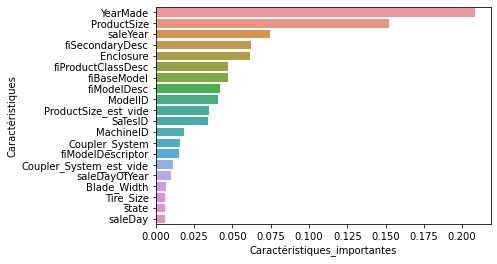

In [95]:
plot_features(X_train.columns, ideal_model.feature_importances_);

L'importance des caractéristiques est très utile pour plusieurs raisons : 

- **Compréhension des données.**
Construire un modèle est une chose, mais comprendre les données qui entrent dans le modèle en est une autre. Comme une matrice de corrélation, l'importance des caractéristiques permet de comprendre la relation entre les caractéristiques et la variable cible. Elle aide également à comprendre quelles caractéristiques ne sont pas pertinentes pour le modèle.

- **Amélioration du modèle.**
Lors de la formation du modèle, nous pouvons utiliser les scores calculés à partir de l'importance des caractéristiques pour réduire la dimensionnalité du modèle. Les scores les plus élevés sont généralement conservés et les scores les plus faibles sont supprimés car ils ne sont pas importants pour le modèle. Cela permet non seulement de simplifier le modèle, mais aussi d'en accélérer le fonctionnement, ce qui améliore finalement les performances du modèle.

- **Interprétabilité du modèle.**
L'importance des caractéristiques est également utile pour interpréter et communiquer notre modèle aux autres parties prenantes. En calculant les scores pour chaque caractéristique, nous pouvons déterminer quelles caractéristiques contribuent le plus au pouvoir prédictif de votre modèle.

